# Redes Neurais

As Redes Neurais Artificiais foram propostas inicialmente em meados de 1980 com o objetivo de imitar a forma como o cérebro humano aprende, especialmente no que se refere as conexões entre os neurônios. 

A ideia surgiu da observação de como partes do cerébro fisicamente vinculadas a um determinado sentido (audição, visão, tato) podem aprender a responder aos outros. Um dos experimentos realizados consistiu em redirecionar os sinais elétricos do nervo óptico (visão) para a região do cérebro responsável pela audição, o resultado surpreendente foi que, após algum tempo, a cobaia "reaprendeu" a enxergar. 

Com a adaptatividade do cérebro humano em mente o objetivo dos autores do modelo de rede neural foi o de propor uma abordagem de aprendizado aplicável a qualquer tipo de problema.

## Motivação

A necessidade de um novo algoritmo para aprendizado de máquina surge de problemas não lineares com uma grande quantidade de entradas, $n > 100 $. Verificamos anteriormente que tanto a regressão linear quanto a logística podem ser adaptadas para mapearem superfícies não lineares, porém, para tanto é necessário adicionar novas entradas que representem a parcela quadrática, cúbica, ou de maior ordem conforme a superfície desejada.

Tomando como exemplo os modelos linear e quadrático apresentados abaixo é possível verificar que a não linearidade aumenta substancialmente a quantidade de parâmetros do modelo.

$$h_{\theta}(x) = \theta_{0} + \theta_{1} x_1 + \theta_{2} x_2$$
$$h_{\theta}(x) = \theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + \theta_{3} x_1 x_2 + \theta_{4} x_1^2 + \theta_{5} x_2^2$$

Para a composição de um modelo não linear de um classificador de imagens com 50x50 pixels em escala de cinza ($n = 2500$) cada entrada deve ser combinada com as demais sem repetição, ou seja:

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_1 x_2 + ... + \theta x_1 x_{2500} + \\  \theta x_2 + \theta x_2^2 + \theta x_2 x_3 + ... + \theta x_2 x_{2500} + \\ ... + \theta x_{2500} + \theta x_{2500}^2$$

Devido a não repetição, $x_1$ realizará 2500 combinações, $x_2$ 2499, $x_3$ 2498 e assim por diante. Em outras palavras, a quantidade de parâmetros do modelo pode ser escrita na forma de uma soma de PA somada com os (n + 1) parâmetros já existentes no modelo linear:

$$k = (2500 + 2499 + 2498 + ... + 3 + 2 + 1) + (1 + 2500)$$
$$k = \frac{(n+1) n}{2} + (n+1) = \frac{(n+1) (n+ 2)}{2} = 3.128.751 $$

Ademais, caso o classificador fosse projetado para processar imagens RGB ($n = 7500$) a quantidade de parâmetros necessária giraria em torno de 28 milhões. Enfim, a quantidade absurda de parâmetros, mesmo em um exemplo simples como o ilustrado, deixa clara a necessidade de uma nova estratégia para a composição de modelos não lineares.

## Modelo

As redes neurais são formadas por camadas, onde cada camada possui uma determinada quantidade de nodos. A primeira camada, denominada de **entrada**, recebe $x$ e possui portanto $n$ nodos. A última camada, denominada de **saída**, fornece $h_\Theta(x)$ e possui uma quantidade de nodos igual a quantidade de saídas do modelo. As demais camadas são denominadas de **ocultas** e apresentam uma quantidade arbitrária de nodos. 

A título de exemplo, a Figura 1 ilustra uma rede neural com **2 nodos na camada de entrada**, **1 camada oculta com 2 nodos** e **uma camada de saída com somente 1 nodo**.

<img src="imgs/neural_network.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Rede Neural.
</div>

Os nodos $a^{(j)}_i$ são identificados conforme sua posição na rede, de tal forma que $j$ representa o número da camada e $i$ a posição do nodo dentro da camada. Sendo assim, na rede exemplificada pela Figura acima os nodo $a^{(2)}_1$ e $a^{(2)}_2$ representam o primeiro e o segundo nodo da camada oculta, respectivamente.

### Propagação para Frente

A Propagação para Frente (Forward Propagation), utilizada para determinar $h_\Theta(x)$, se vale do fato que nas redes neurais as saídas de cada camada são conectadas as entradas da camada imediatamente posterior. 

O método consiste primeiramente em inserir as entradas do modelo na primeira camada da rede e em seguida realizar de forma iterativa e em direção a saída a propagação dos dados. Na propagação a saída de cada camada é dada pela combinação linear das suas entradas, ponderadas pelos parâmetros da camada e aplicada em uma **função de ativação $g(z)$**. Em outras palavras:

$$a^{(1)} = x$$
$$a^{(k)} = g(\Theta^{(k-1)} a^{(k-1)})$$

A função de ativação empregada varia conforme o tipo de problema, entretanto, quase sempre são utilizadas para refletir a característica não linear dos dados. São alguns exemplos de funções de ativação: a função sigmóide, a tangente hiperbólica e a ReLu.

Posto isto, podemos definir a saída da camada oculta presente na Figura: 

$$a_1^{(2)} = g(\Theta_{11}^{(1)} x_1 + \Theta_{12}^{(1)} x_2)$$
$$a_2^{(2)} = g(\Theta_{21}^{(1)} x_1 + \Theta_{22}^{(1)} x_2)$$

$$
\begin{bmatrix} a_1^{(2)} \\ a_2^{(2)} \end{bmatrix} =   
g(\begin{bmatrix} \Theta_{11}^{(1)} & \Theta_{12}^{(1)} \\
                \Theta_{21}^{(1)} & \Theta_{22}^{(1)}
\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix})
= g(\Theta^{(1)} x)
$$

Após, podemos escrever a saída do modelo:

$$
h_\Theta(x) = a_1^{(3)} = g(\Theta_{11}^{(2)} a_1^{(2)} + \Theta_{12}^{(2)} a_2^{(2)})
$$

$$
h_\Theta(x) = \begin{bmatrix} a_1^{(3)} \end{bmatrix} =
g(\begin{bmatrix} \Theta_{11}^{(2)} & \Theta_{12}^{(2)}
\end{bmatrix} \begin{bmatrix} a_1^{(2)} \\ a_2^{(2)} \end{bmatrix})
= g(\Theta^{(2)} a^{(2)})
$$

## Viés (Bias)

Em redes neurais é comum a adição de um nodo de **viés** igual a $1$ em cada uma das camadas que, diferentemente dos demais, não é conectado a camada anterior. Este nodo, representado na Figura 1 pelos nodos $x_0$ e $a_0^{(2)}$, tem como próposito fornecer maior expressividade ao modelo.

<img src="imgs/neural_network_with_bias.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Figura 1 - Rede Neural com Viés.
</div>

O impacto do viés pode ser verificado na resposta de uma rede neural com somente um nodo e uma função de ativação linear, ilustrada pela Figura abaixo.

<img src="imgs/bias_impact_on_neural_network.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Impacto do Bias na Rede Neural.
</div>

Sem o termo de viés o modelo consegue mapear somente dados que passam pela origem do plano cartesiano, enquanto que com o termo o grau de flexibilidade do modelo se torna maior. Abaixo é definido o modelo da rede neural com a presença de viés.


$$a_1^{(2)} = g(\Theta_{11}^{(1)} x_0 + \Theta_{12}^{(1)} x_1 + \Theta_{13}^{(1)} x_2) = g(\Theta_{11}^{(1)} + \Theta_{12}^{(1)} x_1 + \Theta_{13}^{(1)} x_2)$$
$$a_2^{(2)} = g(\Theta_{21}^{(1)} x_0 + \Theta_{22}^{(1)} x_1 + \Theta_{23}^{(1)} x_2) = g(\Theta_{21}^{(1)} + \Theta_{22}^{(1)} x_1 + \Theta_{23}^{(1)} x_2)$$
$$

\begin{bmatrix} a_1^{(2)} \\ a_2^{(2)} \end{bmatrix} =  
g(\begin{bmatrix} \Theta_{11}^{(1)} & \Theta_{12}^{(1)} & \Theta_{13}^{(1)} \\
                \Theta_{21}^{(1)} & \Theta_{22}^{(1)} & \Theta_{23}^{(1)}
\end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ x_2 \end{bmatrix})
= g(\Theta^{(1)} x)
$$

$$
h_\Theta(x) = a_1^{(3)} = g(\Theta_{11}^{(2)} a_0^{(2)} + \Theta_{12}^{(2)} a_1^{(2)} + \Theta_{13}^{(2)} a_2^{(2)}) = g(\Theta_{11}^{(2)} + \Theta_{12}^{(2)} a_1^{(2)} + \Theta_{13}^{(2)} a_2^{(2)})
$$

$$
h_\Theta(x) = \begin{bmatrix} a_1^{(3)} \end{bmatrix} =
g(\begin{bmatrix} \Theta_{11}^{(2)} & \Theta_{12}^{(2)} & \Theta_{13}^{(2)}
\end{bmatrix} \begin{bmatrix} a_0^{(2)} \\ a_1^{(2)} \\ a_2^{(2)} \end{bmatrix})
= g(\Theta^{(2)} a^{(2)})$$

Cada camada possui sua própria matriz de parâmetros os quais, no contexto das redes neurais, também são chamados de **pesos**. $\Theta^{(j)}_{r x s}$ reflete os parâmetros da camada $j$ em que $r$ é dado pela quantidade de nodos da próxima camada e $s$ pela quantidade de nodos da camada atual $+1$. 

O script a seguir implementa a propagação para frente:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def add_ones_column(x):
    """
    Append ones on first column ([a b c] -> [1 a b c])
    Arguments:
        x: np.array (mxn)
    Returns:
        np.array (mxn+1)
    """
    [m, n] = np.shape(x)
    new_x = np.zeros([m, n+1])
    new_x[:,0] = np.ones(m)
    new_x[:,1:] = x[:, 0:]

    return new_x

def sigmoid(z):
    """
    Logistic function
    Arguments:
        z: np.array (mx1)
    Returns:
        np.array (mx1)
    """
    return 1/(1 + np.exp(-z))

def forward_propagation(x, o_list):
    """
    Forward Propagation
    Arguments:
        x: np.array (mxn)
        o_list: list of np.array (rxs). 
                First should be r = n+1 and last s = k 
    Returns:
        list of np.array (mxs)
    """
    a = [x]
    a_l = add_ones_column(x) # bias
    for o in o_list:
        a_l = sigmoid(np.dot(a_l, o))
        a.append(a_l)
        a_l = add_ones_column(a_l) # bias

    return a

Após a definição do modelo, uma observação se faz necessária. A última camada da rede neural possui o mesmo modelo da regressão logística, sendo assim, qual a vantagem deste tipo de abordagem ?

A grande vantagem das redes neurais reside justamente na presença das camadas ocultas. O mapeamento de funções não lineares através da regressão logística era possível porém dependia da escolha adequada do polinômio, já para as redes neurais esse processo é automatizado pela fase de treinamento com a definição da matriz $\Theta^1$.

Ao invés de injetar as entradas diretamente no modelo de regressão logística, $\Theta^1$ seleciona frações das entradas e as combina para permitir a composição de modelos altamente não lineares sem a necessidade de criação de novas entradas. 

## Classificador Binário

A título de exemplo, a seguir é elaborada uma arquitetura de rede neural para classificação de dados binários segundo o operador lógico **XOR**.

<img src="imgs/xor_data_distribution.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Distribuição de Dados do Operador XOR.
</div>

Uma forma de visualizar como modelos complexos podem ser obtidos com a adição de camadas ocultas é realizar a construção da rede de forma modular. Sendo assim, a rede neural do operado XOR é construída pelo agrupamento dos operadores **AND**, **OR** e **(NOT $x_1$) AND (NOT $x_2$)**, desenvolvidos a seguir.

### Operadores AND, OR e (NOT $x_1$) AND (NOT $x_2$)

Abaixo são mostrados os três operadores lógicos cuja construção é realizada com somente uma camada. Os parâmetros dos modelos são definidos de forma arbitrária e a função de ativação utilizada é a sigmóide.

<table><tr>
<td> <img src="imgs/ann_and.png" alt="Drawing"/> </td>
<td> <img src="imgs/ann_or.png" alt="Drawing"/> </td>
<td> <img src="imgs/ann_not_x1_and_not_x2.png" alt="Drawing"/> </td>
</tr></table>

<div align="center">
Redes Neurais dos Operadores Lógicos.
</div>

### Operador XOR

Enfim o operador XOR pode ser contruído com a agregação dos três operadores desenvolvidos anteriormente, arranjados conforme a Figura abaixo.

<img src="imgs/ann_xor.png" alt="linear_model" width="600" style="display:block; margin:auto"/>

<div align="center">
Rede Neural do Operador XOR.
</div>

Conforme pode ser verificado na Figura acima é possível a criação de um modelo altamente não linear com a adição de somente uma camada oculta. O modelo obtido é definido a seguir:

$$XOR = h_\Theta(x) = (x_1 . x_2) | (\neg{x_1} . \neg{x_2})$$

O script abaixo comprova o funcionamento do modelo:

In [3]:
# XOR operator
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # 4x2

o_list = []
o_1 = np.array([[-30, 10], [20, -20], [20, -20]]) # 3x2
o_list.append(o_1)
o_2 = np.array([[-10], [20], [20]]) # 3x1
o_list.append(o_2)

print(forward_propagation(x, o_list)[-1])

[[9.99954561e-01]
 [4.54803785e-05]
 [4.54803785e-05]
 [9.99954561e-01]]


De forma geral, as camadas ocultas atuam como uma espécie de abstração do modelo de tal forma que cada camada captura determinados aspectos dos dados. Baseado nos parâmetros definidos durante a fase de treinamento, as camadas se especializam na detecção de padrões e somente enviam a informação para a camada seguinte quando o padrão é evidenciado.

## Classificador Multiclasse

A composição de um classificador multiclasse através das redes neurais é realizada com a definição da camada de saída com uma quantidade de nodos igual a quantidade de classes previstas pelo problema, ou seja, $h_\Theta(x) \in {\rm I\!R}^k$ onde $k$ é igual ao número de classes.

<img src="imgs/ann_multiclass_classifier.png" alt="linear_model" width="400" style="display:block; margin:auto"/>

<div align="center">
Classificador Multiclasse com Redes Neurais.
</div>

No Exemplo da figura acima a camada de saída possui $3$ nodos, ou seja, o problema prevê $3$ classes possíveis para os dados. Cada nodo de saída fornecerá a probabilidade dos dados de entrada estarem vinculados a sua classe. Em outras palavras:

$$h_\Theta(x) = \begin{bmatrix} 0.1 & 0.2 & 0.7\end{bmatrix}^T $$

Indica 70% de chance dos dados de entrada pertencerem a um elemento da classe iris-virginica.

### Função Custo

A função custo de um modelo de rede neural para classificação multiclasse é uma expansão do modelo desenvolvido para o regressor logístico na estratégia *Um-Contra-Todos*. A diferença do modelo definido abaixo é a quantidade de saídas, afinal tanto $y$ quanto $h_\Theta(x)$ $\in {\rm I\!R}^c$ em que $c$ é igual ao número de classes do problema.


$$J(\Theta) = \frac{1}{m} \sum\limits_{i=1}^{m} \sum\limits_{k=1}^{c} -y_k^{i} (log(h_{\Theta}(x^{i})_k) - (1 - y_k^{i}) (log(1 - h_{\Theta}(x^{i})_k)$$

O objetivo desta função custo é penalizar caso qualquer uma das $c$ saídas do modelo seja diferente do esperado. Desta forma perante a seguinte situação:  

$$y^i = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}^T$$
$$ h_{\Theta}(x^{i}) = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}^T$$

Haverá uma penalização dupla, visto $h_{\Theta}(x^{i})_0$ deveria ser $0$ e $h_{\Theta}(x^{i})_2$ deveria ser 1.

### Treinamento

A etapa de treinamento de um modelo de rede neural consiste em determinar os parâmetros $\Theta$ que minimizam a função custo. Conforme já discutido, os algoritmos destinados a esta tarefa são os otimizadores que possuem como base comum o cálculo do gradiente. O gradiente, por sua vez, é dado pela derivada parcial do custo em relação aos parâmetros do modelo, entretanto, no caso das redes neurais cada camada possui sua própria matriz de parâmetros. 

Sendo assim, o gradiente será definido pela derivada parcial do custo em relação a cada um dos elementos da matriz $\Theta^{(l)}$ em que $l$ representa o número da camada.

$$\nabla J(\Theta) = \frac{\partial J(\Theta)}{\partial \Theta^{(l)}_{ij}} $$

A título de exemplo do cálculo do gradiente, será utilizada uma rede neural para classificação multiclasse com função de ativação sigmóide, 2 duas entradas, 1 camada oculta com 2 nodos e 2 saídas, mostrada na Figura abaixo:

<img src="imgs/ann_multiclass_example.png" alt="linear_model" width="800" style="display:block; margin:auto"/>

<div align="center">
Rede Neural com duas Saídas.
</div>

Primeiramente reescreveremos a função custo para denotar as duas saídas:

$$J(\Theta) = \frac{1}{m} \sum\limits_{i=1}^{m} \sum\limits_{k=1}^{c} -y_k^{i} (log(h_{\Theta}(x^{i})_k) - (1 - y_k^{i}) (log(1 - h_{\Theta}(x^{i})_k)$$

$$h_\Theta(x) = a^{3}$$

$$J(\Theta) = \frac{-1}{m} \sum\limits_{i=1}^{m} y_1^{i} log(a_1^{3}) + (1 - y_1^{i}) (log(1 - a_1^{3})) + y_2^{i} log(a_2^{3}) + (1 - y_2^{i}) (log(1 - a_2^{3})$$

A seguir calculamos a derivada parcial para os parâmetros da camada $\Theta^{(2)}$: 

$$\frac{\partial J(\Theta)}{\partial \Theta^{(2)}_{11}} = \frac{-1}{m} \sum\limits_{i=1}^{m} (\frac{y_1^{i}}{a_1^{3}} \frac{\partial a_1^{3}}{\partial \Theta^{(2)}_{11}} + \frac{1 - y_1^{i}}{1 - a_1^{3}} \frac{\partial (1 - a_1^{3})}{\partial \Theta^{(2)}_{11}}) + (\frac{y_2^{i}}{a_2^{3}} \frac{\partial a_2^{3}}{\partial \Theta^{(2)}_{11}} + \frac{1 - y_2^{i}}{1 - a_2^{3}} \frac{\partial (1 - a_2^{3})}{\partial \Theta^{(2)}_{11}})$$


$$\frac{\partial J(\Theta)}{\partial \Theta^{(2)}_{11}} = \frac{-1}{m} \sum\limits_{i=1}^{m} (\frac{y_1^{i}}{a_1^{3}} g(z_1^{3}) (1 - g(z_1^{3})) \frac{\partial (z_1^{3})}{\partial \Theta^{(2)}_{11}} - \frac{1 - y_1^{i}}{1 - a_1^{3}} g(z_1^{3}) (1 - g(z_1^{3})) \frac{\partial (z_1^{3})}{\partial \Theta^{(2)}_{11}}) + \\

(\frac{y_2^{i}}{a_2^{3}} g(z_2^{3}) (1 - g(z_2^{3})) \frac{\partial (z_2^{3})}{\partial \Theta^{(2)}_{11}} - \frac{1 - y_2^{i}}{1 - a_2^{3}} g(z_2^{3}) (1 - g(z_2^{3})) \frac{\partial (z_2^{3})}{\partial \Theta^{(2)}_{11}})$$

Porém $\frac{\partial (z_2^{3})}{\partial \Theta^{(2)}_{11}} = 0$, ou seja, a variação de $\Theta^{(2)}_{11}$ não afeta a saída $a_2^{3}$. Sendo assim:

$$\frac{\partial J(\Theta)}{\partial \Theta^{(2)}_{11}} = \frac{-1}{m} \sum\limits_{i=1}^{m} (\frac{y_1^{i}}{a_1^{3}} g(z_1^{3}) (1 - g(z_1^{3})) \frac{\partial (z_1^{3})}{\partial \Theta^{(2)}_{11}} - \frac{1 - y_1^{i}}{1 - a_1^{3}} g(z_1^{3}) (1 - g(z_1^{3})) \frac{\partial (z_1^{3})}{\partial \Theta^{(2)}_{11}})$$

$$\frac{\partial J(\Theta)}{\partial \Theta^{(2)}_{11}} = \frac{-1}{m} \sum\limits_{i=1}^{m} \frac{y_1^{i}}{a_1^{3}} g(z_1^{3}) (1 - g(z_1^{3})) a_1^{2} - \frac{1 - y_1^{i}}{1 - a_1^{3}} g(z_1^{3}) (1 - g(z_1^{3})) a_1^{2}$$

Os demais parâmetros da camada podem ser determinados de forma análoga:

$$\frac{\partial J(\Theta)}{\partial \Theta^{(2)}_{12}} = \frac{-1}{m} \sum\limits_{i=1}^{m} (\frac{y_1^{i}}{a_1^{3}} g(z_1^{3}) (1 - g(z_1^{3})) a_2^{2} - \frac{1 - y_1^{i}}{1 - a_1^{3}} g(z_1^{3}) (1 - g(z_1^{3})) a_2^{2}$$
$$\frac{\partial J(\Theta)}{\partial \Theta^{(2)}_{21}} = \frac{-1}{m} \sum\limits_{i=1}^{m} (\frac{y_2^{i}}{a_2^{3}} g(z_2^{3}) (1 - g(z_2^{3})) a_1^{2} - \frac{1 - y_2^{i}}{1 - a_2^{3}} g(z_2^{3}) (1 - g(z_2^{3})) a_1^{2}$$
$$\frac{\partial J(\Theta)}{\partial \Theta^{(2)}_{22}} = \frac{-1}{m} \sum\limits_{i=1}^{m} (\frac{y_2^{i}}{a_2^{3}} g(z_2^{3}) (1 - g(z_2^{3})) a_2^{2} - \frac{1 - y_2^{i}}{1 - a_2^{3}} g(z_2^{3}) (1 - g(z_2^{3})) a_2^{2}$$

Utilizando a regra da cadeia, definida abaixo, a notação pode ser severamente simplificada:

$$\frac{\partial p(q(z))}{\partial z} = \frac{\partial p}{\partial q} \frac{\partial q}{\partial z}$$

$$\frac{\partial J(\Theta)}{\Theta^{(2)}_{11}} = \frac{\partial J(\Theta)}{a_1^{(3)}} \frac{\partial a_1^{(3)}}{z_1^{(3)}} \frac{\partial z_1^{(3)}}{\Theta^{(2)}_{11}}$$
$$\frac{\partial J(\Theta)}{\Theta^{(2)}_{12}} = \frac{\partial J(\Theta)}{a_1^{(3)}} \frac{\partial a_1^{(3)}}{z_1^{(3)}} \frac{\partial z_1^{(3)}}{\Theta^{(2)}_{12}}$$
$$\frac{\partial J(\Theta)}{\Theta^{(2)}_{21}} = \frac{\partial J(\Theta)}{a_2^{(3)}} \frac{\partial a_2^{(3)}}{z_2^{(3)}} \frac{\partial z_2^{(3)}}{\Theta^{(2)}_{21}}$$
$$\frac{\partial J(\Theta)}{\Theta^{(2)}_{22}} = \frac{\partial J(\Theta)}{a_2^{(3)}} \frac{\partial a_2^{(3)}}{z_2^{(3)}} \frac{\partial z_2^{(3)}}{\Theta^{(2)}_{22}}$$

Para a determinação dos parâmetros da primeira camada é importante observar que a matriz $\Theta^{(1)}$ afeta ambas as saídas de $a^{(3)}$, além de uma das saídas de $a^{(2)}$. Posto isto, a seguir os parâmetros são definidos em função das derivadas parciais conforme postulado pela regra da cadeia. 

$$\frac{\partial J(\Theta)}{\Theta^{(1)}_{11}} = \frac{\partial J(\Theta)}{a_1^{(3)}} \frac{\partial a_1^{(3)}}{z_1^{(3)}} \frac{\partial z_1^{(3)}}{a^{(2)}_{1}} \frac{\partial a_1^{(2)}}{z_1^{(2)}} \frac{\partial z_1^{(2)}}{\Theta^{(1)}_{11}} + \frac{\partial J(\Theta)}{a_2^{(3)}} \frac{\partial a_2^{(3)}}{z_2^{(3)}} \frac{\partial z_2^{(3)}}{a^{(2)}_{1}} \frac{\partial a_1^{(2)}}{z_1^{(2)}} \frac{\partial z_1^{(2)}}{\Theta^{(1)}_{11}}$$

$$\frac{\partial J(\Theta)}{\Theta^{(1)}_{12}} = \frac{\partial J(\Theta)}{a_1^{(3)}} \frac{\partial a_1^{(3)}}{z_1^{(3)}} \frac{\partial z_1^{(3)}}{a^{(2)}_{1}} \frac{\partial a_1^{(2)}}{z_1^{(2)}} \frac{\partial z_1^{(2)}}{\Theta^{(1)}_{12}} + \frac{\partial J(\Theta)}{a_2^{(3)}} \frac{\partial a_2^{(3)}}{z_2^{(3)}} \frac{\partial z_2^{(3)}}{a^{(2)}_{1}} \frac{\partial a_1^{(2)}}{z_1^{(2)}} \frac{\partial z_1^{(2)}}{\Theta^{(1)}_{12}}$$

$$\frac{\partial J(\Theta)}{\Theta^{(1)}_{21}} = \frac{\partial J(\Theta)}{a_1^{(3)}} \frac{\partial a_1^{(3)}}{z_1^{(3)}} \frac{\partial z_1^{(3)}}{a^{(2)}_{2}} \frac{\partial a_2^{(2)}}{z_2^{(2)}} \frac{\partial z_2^{(2)}}{\Theta^{(1)}_{21}} + \frac{\partial J(\Theta)}{a_2^{(3)}} \frac{\partial a_2^{(3)}}{z_2^{(3)}} \frac{\partial z_2^{(3)}}{a^{(2)}_{2}} \frac{\partial a_2^{(2)}}{z_2^{(2)}} \frac{\partial z_2^{(2)}}{\Theta^{(1)}_{21}}$$

$$\frac{\partial J(\Theta)}{\Theta^{(1)}_{22}} = \frac{\partial J(\Theta)}{a_1^{(3)}} \frac{\partial a_1^{(3)}}{z_1^{(3)}} \frac{\partial z_1^{(3)}}{a^{(2)}_{2}} \frac{\partial a_2^{(2)}}{z_2^{(2)}} \frac{\partial z_2^{(2)}}{\Theta^{(1)}_{22}} + \frac{\partial J(\Theta)}{a_2^{(3)}} \frac{\partial a_2^{(3)}}{z_2^{(3)}} \frac{\partial z_2^{(3)}}{a^{(2)}_{2}} \frac{\partial a_2^{(2)}}{z_2^{(2)}} \frac{\partial z_2^{(2)}}{\Theta^{(1)}_{22}}$$

Com a análise dos parâmetros obtidos acima é possível constatar o alto custo computacional desta estratégia. Afinal mesmo para um modelo simples como o apresentado, com somente $8$ parâmetros, é necessária a solução de $52$ derivadas parciais.  

Entretanto também é possível verificar que uma série destas derivadas se repetem. Sendo assim, a seguir é apresentado o algoritmo denominado de **Retropropagação**, utilizado para garantir a eficiência da etapa de treinamento das redes neurais.

### Retropropagação

A retropopagação (backpropagation) rescreve as derivadas parciais dos parâmetros do modelo para garantir a reutilização dos termos que se repetem. Iniciando pelos parâmetros da última camada, é possível verificar que as duas primeiras colunas se repetem e podem ser reescritas na forma de um termo $\delta^{(3)}$, denominado de erro da última camada: 

$$ \frac{\partial J(\Theta)}{a_i^{(3)}} \frac{\partial a_i^{(3)}}{z_i^{(3)}} = \delta_i^{(3)} = \frac{-1}{m} (\frac{y_i}{a_i^{3}} - \frac{1 - y_i}{1 - a_i^{3}}) g'(a_i^{3})$$

Reescrevendo os parâmetros da última camada segundo a nova notação:

$$\frac{\partial J(\Theta)}{\Theta^{(2)}_{11}} = \delta_1^{(3)} \frac{\partial z_1^{(3)}}{\Theta^{(2)}_{11}} = \delta_1^{(3)} a_1^{(2)}$$
$$\frac{\partial J(\Theta)}{\Theta^{(2)}_{12}} = \delta_1^{(3)} \frac{\partial z_1^{(3)}}{\Theta^{(2)}_{12}} = \delta_1^{(3)} a_2^{(2)}$$
$$\frac{\partial J(\Theta)}{\Theta^{(2)}_{21}} = \delta_2^{(3)} \frac{\partial z_2^{(3)}}{\Theta^{(2)}_{21}} = \delta_2^{(3)} a_1^{(2)}$$
$$\frac{\partial J(\Theta)}{\Theta^{(2)}_{22}} = \delta_2^{(3)} \frac{\partial z_2^{(3)}}{\Theta^{(2)}_{22}} = \delta_2^{(3)} a_2^{(2)}$$

Devido a repetição dos termos, os parâmetros das demais camadas também podem ser reescritos com o objetivo de eliminar a redundância no cálculo das derivadas parciais. A seguir o parâmetro $\Theta^{(1)}_{11}$ é redefinido, porém, o procedimento é idêntico para os demais parâmetros.

$$\frac{\partial J(\Theta)}{\Theta^{(1)}_{11}} = \frac{\partial J(\Theta)}{a_1^{(3)}} \frac{\partial a_1^{(3)}}{z_1^{(3)}} \frac{\partial z_1^{(3)}}{a^{(2)}_{1}} \frac{\partial a_1^{(2)}}{z_1^{(2)}} \frac{\partial z_1^{(2)}}{\Theta^{(1)}_{11}} + \frac{\partial J(\Theta)}{a_2^{(3)}} \frac{\partial a_2^{(3)}}{z_2^{(3)}} \frac{\partial z_2^{(3)}}{a^{(2)}_{1}} \frac{\partial a_1^{(2)}}{z_1^{(2)}} \frac{\partial z_1^{(2)}}{\Theta^{(1)}_{11}}$$

Primeiramente o erro da última camada é reutilizado:

$$ \frac{\partial J(\Theta)}{a_1^{(3)}} \frac{\partial a_1^{(3)}}{z_1^{(3)}} = \delta_1^{(3)}$$

$$\frac{\partial J(\Theta)}{\Theta^{(1)}_{11}} = \delta_1^{(3)} \frac{\partial z_1^{(3)}}{a^{(2)}_{1}} \frac{\partial a_1^{(2)}}{z_1^{(2)}} \frac{\partial z_1^{(2)}}{\Theta^{(1)}_{11}} + \delta_2^{(3)} \frac{\partial z_2^{(3)}}{a^{(2)}_{1}} \frac{\partial a_1^{(2)}}{z_1^{(2)}} \frac{\partial z_1^{(2)}}{\Theta^{(1)}_{11}}$$

É possível verificar também que $\frac{\partial z_1^{(3)}}{a^{(2)}_{1}} \frac{\partial a_1^{(2)}}{z_1^{(2)}} = \Theta^{(2)}_{11} f'(a^{(2)})$ e $\frac{\partial z_2^{(3)}}{a^{(2)}_{1}} \frac{\partial a_1^{(2)}}{z_1^{(2)}} = \Theta^{(2)}_{21} f'(a^{(2)})$, então:

$$\frac{\partial J(\Theta)}{\Theta^{(1)}_{11}} = (\delta_1^{(3)} \Theta^{(2)}_{11} f'(a^{(2)}) + \delta_2^{(3)} \Theta^{(2)}_{21} f'(a^{(2)})) \frac{\partial z_1^{(2)}}{\Theta^{(1)}_{11}}$$

Posto isto, podemos definir um novo termo referente ao erro, porém agora para as demais camadas:

$$\delta_1^{(2)} = \delta_1^{(3)} \Theta^{(2)}_{11} f'(a^{(2)}) + \delta_2^{(3)} \Theta^{(2)}_{21} f'(a^{(2)})$$

$$\delta_j^{(l)} = f'(a^{(l)}) \sum\limits_{i=1}^{n} \delta_i^{(l+1)} \Theta_{ij}^{(l)} $$

Retomando o cálculo da derivada parcial dos parâmetros do modelo:

$$\frac{\partial J(\Theta)}{\Theta^{(1)}_{11}} = \delta_1^{(2)} \frac{\partial z_1^{(2)}}{\Theta^{(1)}_{11}}$$

$$\frac{\partial J(\Theta)}{\Theta^{(1)}_{11}} = \delta_1^{(2)} x_1$$

Enfim, a derivada parcial dos parâmetros do modelo de uma rede neural podem ser definidos conforme segue:

$$\frac{\partial J(\Theta)}{\Theta^{(l)}_{ij}} = (\delta_j^{(l+1)})^T a^{(l)}$$

#### Inicialização das matrizes $\Theta$


O algoritmo de retroprogação para obtenção das derivadas parciais de $\Theta$ depende primeiramente da aplicação da propagação para frente, ou seja, da definição das saídas da rede. Sendo assim, é necessário que seja realizada uma estimativa inicial para os parâmetros do modelo.

Diferentemente dos algoritmos discutidos até então, o algoritmo de retropropagação requer um cuidado especial com relação ao valor inicial de $\Theta$. É possível mostrar que se forem utilizados parâmetros idênticos para inicialização da rede haverá uma limitação severa na flexibilidade do modelo, afinal:

$$\Theta_{ij}^l = k, \hspace{0.5 cm} \forall \hspace{0.2 cm} i,j,l$$
$$a_{1}^l = a_{2}^l, \hspace{0.5 cm} \delta_{1}^l = \delta_{2}^l$$
$$\frac{\partial{J(\Theta)}}{\partial{\Theta_{ij}^l}} = d^l$$

A consequência é que, devido as taxas de atualização também serem idênticas, a igualdade das saídas $a_{1}^l = a_{2}^l$ será mantida no modelo resultante mesmo se for utilizado um algoritmo de otimização robusto.

Sendo assim, é comum a utilização de um **conjunto de inicialização randômico** para os parâmetros do modelo. Entretanto, para garantir a reprodutibilidade dos exemplos produzidos é uma boa prática definir a semente do gerador randômico, conforme segue.

In [4]:
SEED = 17 # makes the random numbers predictable
np.random.seed(SEED)

#### Algoritmo

A seguir o algoritmo de retropropagação é resumido.

1) Defina um conjunto de parâmetros inicial randômico e para cada exemplo de treinamento faça:

2) Realize a propagação direta para obter as saídas do modelo.

3) Calcule o erro para a última camada definida como $L$.

$$\delta_i^{(L)} = \frac{-1}{m} (\frac{y_i^{i}}{a_i^{L}} - \frac{1 - y_i^{i}}{1 - a_i^{L}}) g'(a_i^{L})$$

4) Defina a camada atual como a penúltima.

$$l = L-1$$

5) Acumule as derivadas parciais para a camada atual dado o exemplo de treinamento.

$$\frac{\partial J(\Theta)}{\Theta^{(l)}_{ij}} \mathrel{+}= (\delta_j^{(l+1)})^T a^{(l)}$$

6) Calcule o erro para a camada atual.

$$\delta_j^{(l)} = f'(a^{(l)}) \sum\limits_{i=1}^{n} \delta_i^{(l+1)} \Theta_{ij}^{(l)} $$

7) Avance uma camada em direção ao início da rede.

$$l = l-1$$

Repita os passos de 5 a 7 até atingir a camada referente as entradas da rede. 

O script a seguir implementa o algoritmo e mostra a obtenção dos parâmetros do modelo para o operador XOR com o algoritmo gradiente descendente. 

iterations: 30000
[[0.90367076]
 [0.14950604]
 [0.14949435]
 [0.78006673]]


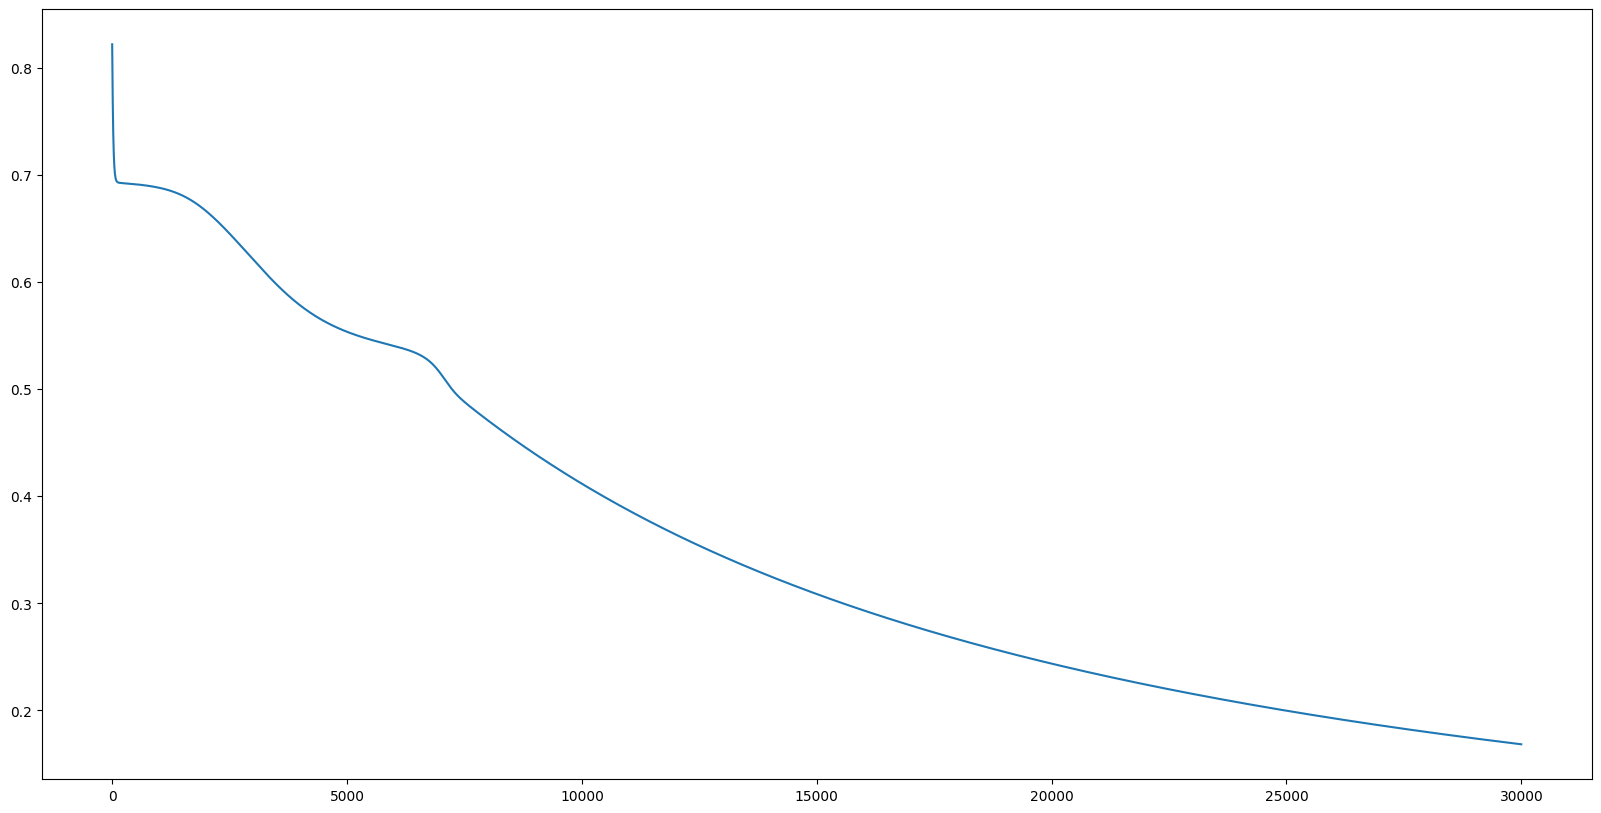

In [5]:
def log_without_nan(x):
    """
    Transforms nan to number
    Arguments:
        x: np.array (mx1)
    Returns:
        np.array (mx1)
    """
    return np.nan_to_num(np.log(x))

def logistic_regression_cost(h_x, y):
    """
    Logistic regression cost
    Arguments:
        h_x: np.array (mx1)
        y: np.array (mx1)
    Returns:
        double (half mse)
    """
    m = np.shape(y)[0]
    y_t = np.transpose(y) # mx1 -> 1xm

    J = np.dot(-y_t, (log_without_nan(h_x))) - np.dot((1-y_t),(log_without_nan(1 - h_x))) # 1xn

    return J/m

def d_sigmoid(g_z):
    """
    Derivate of sigmoid function
    Arguments:
        g_z: np.array (mx1)
    Returns:
        np.array (mx1)
    """
    return g_z * (1 - g_z) 
    
def backpropagation(x, o_list, y):
    """
    Backpropagation
    Arguments:
        x: np.array (mxn)
        o_list: list of np.array (rxs). 
                First should be r = n+1 and last s = k
        y: np.array (mxk)
    Returns:
        list of np.array (rxs).
    """
    m = np.shape(x)[0]
    a = forward_propagation(x, o_list)
    L = len(a) - 1

    a_L = a[L] # output from model
    delta_l = (-1/m) * (y/a_L - (1 - y)/(1-a_L)) * d_sigmoid(a_L)
    
    # backwards
    dJ_o = []
    l = L - 1
    for o in reversed(o_list):
        dJ_o.append(np.dot(np.transpose(a[l]), delta_l))
        delta_l = np.dot(delta_l, np.transpose(o[1:])) * d_sigmoid(a[l]) # o[1:] to ignore bias
        l = l - 1
        
    return list(reversed(dJ_o)) # reorder

def gradient_descent(x, o_list, y, alpha, max_iterations, min_error):
    """
    Gradient descent -> Discover what o minimize j
    Arguments:
        x: np.array (mxn)
        o_list: list of np.array (rxs). 
                First should be r = n+1 and last s = k
        y: np.array (mxk)
        alpha: double (learning rate)
        max_iterations: int
        min_error: double (stop condition)
    Returns:
        o_list: list of np.array (rxs)
        i: int (iterations number)
        j_hist: list of double
    """
    i = 0
    grad = backpropagation(x, o_list, y)
    j_hist = []
    while np.linalg.norm(grad[-1]) > min_error and i < max_iterations:
        for o_l, grad_l in zip(o_list, grad):
            o_l[1:] = o_l[1:] - alpha*grad_l
        
        h_x = forward_propagation(x, o_list)[-1]
        j_hist.append(logistic_regression_cost(h_x, y)[0])
        
        grad = backpropagation(x, o_list, y)
        i += 1

    return [o_list, i, j_hist]

def neural_network_classifier(x, y, hidden_layers_sizes, alpha, max_iterations, min_error):
    """
    Neural network classifier
    Arguments:
        x: np.array (mxn)
        y: np.array (mxk)
        hidden_layers_sizes: list of np.array (rxs)
        alpha: double (learning rate)
        max_iterations: int
        min_error: double (stop condition)
    Returns:
        o_list: list of np.array (rxs)
        i: int (iterations number)
        j_hist: list of double
    """
    
    o_start_list = []
    last_hidden_layer_size = np.shape(x)[1]
    for hidden_layer_size in hidden_layers_sizes:
        o_start_list.append(np.random.rand(last_hidden_layer_size + 1, hidden_layer_size))
        last_hidden_layer_size = hidden_layer_size
    
    o_start_list.append(np.random.rand(last_hidden_layer_size + 1, np.shape(y)[1]))
    return gradient_descent(x, o_start_list, y, alpha, max_iterations, min_error)

# XOR expected output
y = np.array([[1], [0], [0], [1]]) # 4x1

alpha = 1e-1
max_iterations = 30000 # 7500
min_error = 1e-4
hidden_layers_sizes = (2,) # (8,)
[min_o, i, j_hist] = neural_network_classifier(x, y, hidden_layers_sizes, alpha, max_iterations, min_error)
print('iterations:', i)
print(forward_propagation(x, min_o)[-1])

plt.figure(figsize=(20,10))
plt.plot(j_hist)
plt.show()

É possível mostrar que **a função custo de uma rede neural não é convexa**, como consequência o gradiente descendente necessita de uma quantidade elevada de iterações para minimizar o custo, além de não haver garantias de obtenção do mínimo global. Também é possível constatar uma alta correlação entre o número de nodos da camada oculta e a quantidade de iterações.

São alternativas para redução do custo computacional do treinamento a utilização de outros métodos de minimização, outros tipos de função de ativação, além da variação da quantidade de nodos das camadas ocultas. Posto isto, em seguida no material serão discutidas estratégias para seleção destes, que na literatura são comumente denominados de **hiperparâmetros**.    

Enfim, um detalhamento maior do algoritmo de retropropagação, inclusive para outras funções custo, pode ser verificado em [Neural networks: training with backpropagation](https://www.jeremyjordan.me/neural-networks-training/).

## Problema

A seguir é utilizada uma rede neural para composição de um classificador linear multiclasse destinado ao problema de classificação de dígitos escritos a mão, presente no dataset disponível em: [datasets/classifier_multiclass/handwritten_digits.csv](datasets/classifier_multiclass/handwritten_digits.csv).

In [6]:
import pandas as pd

df = pd.read_csv('datasets/classifier_multiclass/handwritten_digits.csv', header=None)
X = df.iloc[:, 0:400].values
m = np.shape(X)[0]
y = df.iloc[:, 400]

print('shape: ', df.shape)
print('classes:')
y.value_counts()

shape:  (5000, 401)
classes:


0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
Name: 400, dtype: int64

O dataset proposto acima é composto de 5000 imagens de dígitos escritos a mão com resolução de 20x20 pixels em escala de cinza, além do rótulo da imagem presente na última coluna. No dataset as imagens são vetorizadas, o que resulta em uma matrix de tamanho 5000x401. Com os dados mostrados acima também é possível verificar que o dataset é balanceado, ou seja, possui a mesma quantidade de exemplos para os dígitos de 0 a 9.

O script abaixo renderiza um conjunto aleatório de imagens o que permite inspecionar o conteúdo do dataset. 

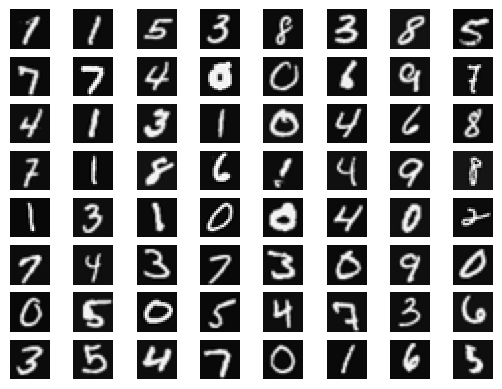

In [67]:
import scipy.ndimage as ndimage
def show_image(X, n_images, size_image = [20, 20]):
    """
    Show image in gray scale
    Arguments:
        X: np.array (mxn)
        n_images: int
        size_image: np.array (rxs) -> r.s = n
    Returns:
    """
    
    n_images_sqrt = int(np.sqrt(n_images))
    f, axarr = plt.subplots(n_images_sqrt, n_images_sqrt)
    
    image = 0
    for i in range(n_images_sqrt):
        for j in range(n_images_sqrt):
            x = X[image, :].reshape(size_image)
            x_rot = ndimage.rotate(x, 90, reshape=True)

            axarr[i, j].imshow(x_rot, cmap='gray', origin='lower')
            axarr[i, j].axis('off')
            image += 1
    
n_images = 64
indexes = np.random.randint(0, m, n_images)
show_image(X[indexes], n_images)